# =======================================================
#       Task 1: Predictive Modeling (Classification)
# =======================================================

# OBJECTIVE:-

#Preprocess data

#Handle categorical variables

#Feature scaling

#Train multiple classification models

#Evaluate using Accuracy, Precision, Recall, F1-score

#Perform hyperparameter tuning

#Tools: pandas, scikit-learn

In [1]:
#STEP 1: Import Required Libraries

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
# STEP 2: Load Dataset

train_df = pd.read_csv("churn-bigml-80.csv")
test_df = pd.read_csv("churn-bigml-20.csv")

print(train_df.head())
print(train_df.info())

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

In [3]:
#STEP 3: Preprocess Data
#1️⃣ Convert categorical columns

train_df = pd.get_dummies(train_df, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

#Make sure both datasets have same columns:
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

# 2️⃣Define Features & Target
#Target column usually is:
#Check exact column name using:
print(train_df.columns)

#Then:
X_train = train_df.drop("Churn", axis=1)
y_train = train_df["Churn"]

X_test = test_df.drop("Churn", axis=1)
y_test = test_df["Churn"]




Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'Churn', 'State_AL', 'State_AR', 'State_AZ',
       'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL',
       'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN',
       'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME',
       'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC',
       'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV',
       'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI',
       'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA',
       'State_VT', 'State_WA'

In [4]:
# STEP 4: Feature Scaling

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
#STEP 5: Train Multiple Models

#1️⃣ Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)


#2️⃣ Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


#3️⃣ Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [6]:
# STEP 6: Evaluate Models

#Example for Logistic Regression:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))


#Do same for Decision Tree and Random Forest.

Logistic Regression:
Accuracy: 0.8590704647676162
Precision: 0.5106382978723404
Recall: 0.25263157894736843
F1 Score: 0.3380281690140845


In [7]:
# STEP 7: Hyperparameter Tuning (Random Forest Example)
 
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid,
                    cv=5)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': 20, 'n_estimators': 100}


#📊 Expected Results

#Typically:

#✔ Random Forest gives highest accuracy

#✔ Logistic Regression gives stable performance

#✔ Decision Tree may overfit

In [8]:
# Decision Tree Results
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))

# Random Forest Results
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Decision Tree:
Accuracy: 0.9340329835082459
Precision: 0.7802197802197802
Recall: 0.7473684210526316
F1 Score: 0.7634408602150538

Random Forest:
Accuracy: 0.9415292353823088
Precision: 0.9827586206896551
Recall: 0.6
F1 Score: 0.7450980392156863


# =======================================================================
#     Task 3: Natural Language Processing(NLP) - Sentiment Analysis
# =======================================================================

# OBJECTIVE

#Preprocess text data

#Remove stopwords

#Perform sentiment analysis

#Classify as Positive / Negative / Neutral

#Visualize sentiment distribution

#Create word cloud

#Tools:

#pandas

#nltk

#TextBlob

#matplotlib

#wordcloud

In [9]:
#STEP 2: Import Libraries

import pandas as pd
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [10]:
#Download stopwords:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohdf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# STEP 3: Load Dataset

df = pd.read_csv("3_Sentiment.csv")
print(df.head())
print(df.columns)
df['Text']
df.drop("Unnamed: 0", axis=1, inplace=True)


#Clean Text
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', str(text))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df['clean_text'] = df['Text'].apply(clean_text)

   Unnamed: 0                                               Text    Sentiment  \
0           0   Enjoying a beautiful day at the park!        ...   Positive     
1           1   Traffic was terrible this morning.           ...   Negative     
2           2   Just finished an amazing workout! 💪          ...   Positive     
3           3   Excited about the upcoming weekend getaway!  ...   Positive     
4           4   Trying out a new recipe for dinner tonight.  ...   Neutral      

          Timestamp            User     Platform  \
0  15-01-2023 12:30   User123          Twitter     
1  15-01-2023 08:45   CommuterX        Twitter     
2  15-01-2023 15:45   FitnessFan      Instagram    
3  15-01-2023 18:20   AdventureX       Facebook    
4  15-01-2023 19:55   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes       Country  \
0   #Nature #Park                                    15     30     USA         
1   #Traffic #Morning                   

In [12]:
# STEP 4: Text Preprocessing
#1️⃣ Lowercase conversion

df['Text'] = df['Text'].str.lower()

#2️⃣ Remove Stopwords
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', str(text))  # remove punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df['clean_text'] = df['Text'].apply(clean_text)


In [13]:
# TEP 5: Sentiment Analysis using TextBlob
from textblob import TextBlob
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['clean_text'].apply(get_sentiment)

In [14]:
# STEP 6: Sentiment Distribution
print(df['Sentiment'].value_counts())

Sentiment
Neutral     322
Positive    287
Negative    123
Name: count, dtype: int64


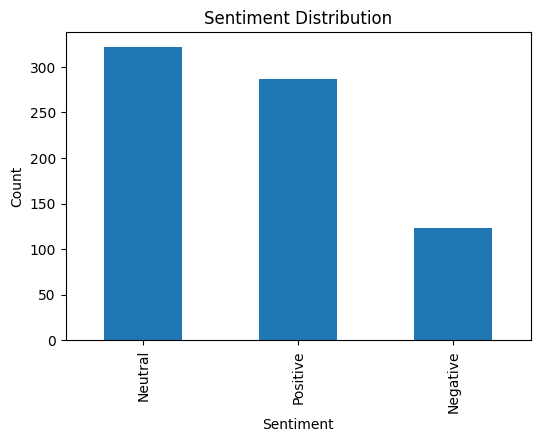

In [15]:
# TEP 7: Visualize Sentiment Distribution 
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
df['Sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

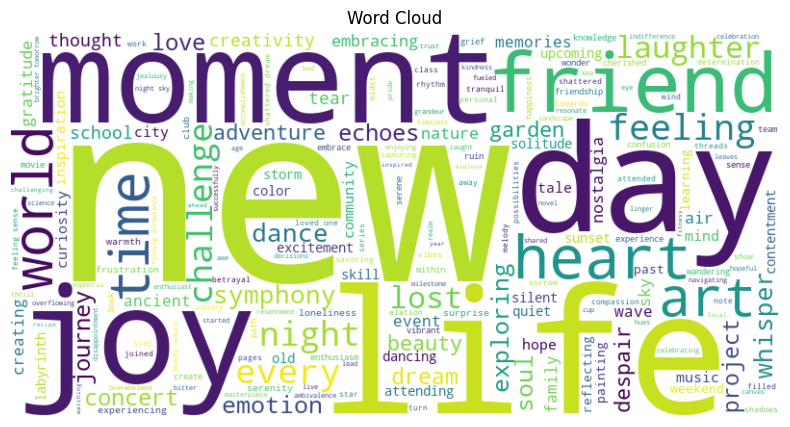

In [16]:
# STEP 8: Generate Word Cloud
from wordcloud import WordCloud
text_all = " ".join(df['clean_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")
plt.show()

In [17]:
# Save Sentiment Distribution Graph
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
df['Sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.savefig("sentiment_distribution.png", dpi=300, bbox_inches='tight')
plt.close()

In [18]:
# Worldcloud image
# Combine all cleaned text
text_all = " ".join(df['clean_text'])

# Create WordCloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white'
).generate(text_all)

# Plot
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")

# Save Image
plt.savefig("wordcloud.png", dpi=300, bbox_inches='tight')
plt.close()